In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [57]:
df = pd.read_csv('HistoricalQuotes.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [58]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771
2517,03/01/2010,$29.8557,137312041,$29.3928,$29.9286,$29.35


In [59]:
df.shape

(2518, 6)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [61]:
df.isna().sum()

Date           0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64

In [62]:
# Cleaning data

# Cleaning data
df = df.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open': 'Open', ' High':'High', ' Low':'Low'})
df['Close'] = df['Close'].replace('[\$,]', '', regex=True).astype(float)
df['Open'] = df['Open'].replace('[\$,]', '', regex=True).astype(float)
df['High'] = df['High'].replace('[\$,]', '', regex=True).astype(float)
df['Low'] = df['Low'].replace('[\$,]', '', regex=True).astype(float)
df.head()


,Date,Close,Volume,Open,High,Low
0,02/28/2020,273.36,106721200,257.26,278.41,256.37
1,02/27/2020,273.52,80151380,281.10,286.00,272.96
2,02/26/2020,292.65,49678430,286.53,297.88,286.50
3,02/25/2020,288.08,57668360,300.95,302.53,286.13
4,02/24/2020,298.18,55548830,297.26,304.18,289.23


In [63]:
df.dtypes

Date       object
Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

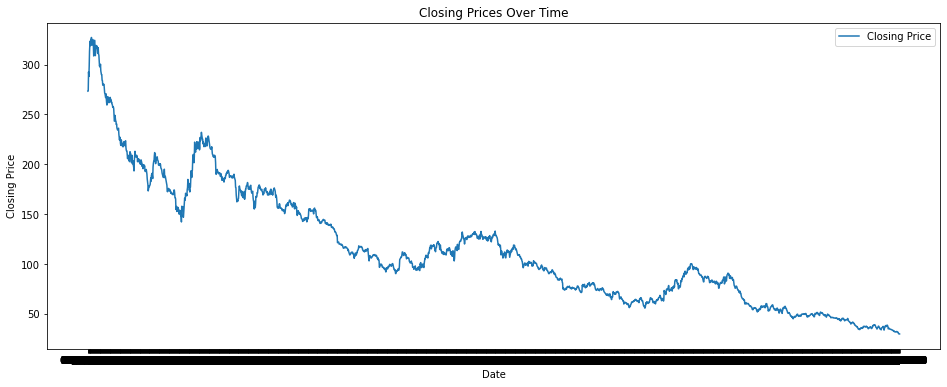

In [64]:
# Plotting the closing prices over time
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

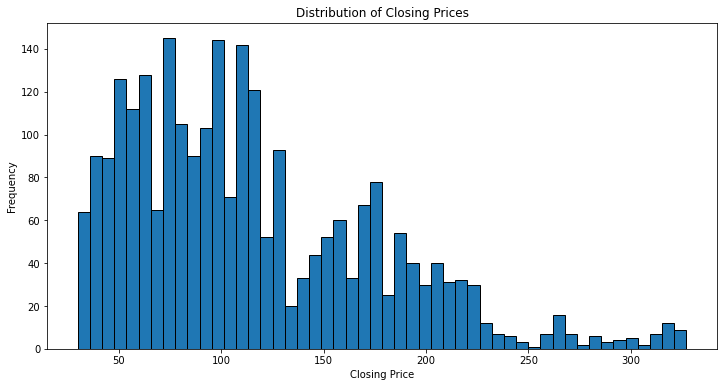

In [65]:
# Visualizing the distribution of closing prices
plt.figure(figsize=(12, 6))
plt.hist(df['Close'], bins=50, edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

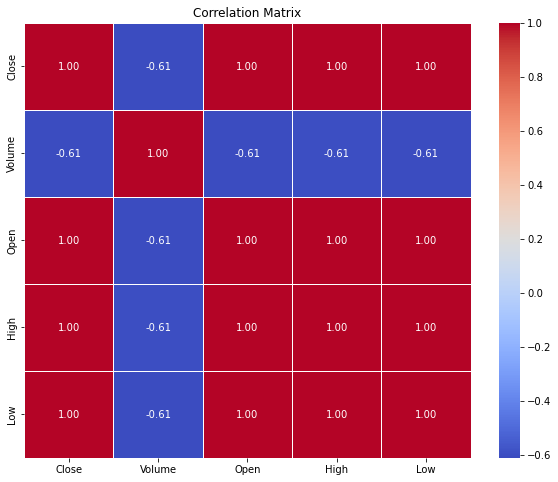

In [66]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [67]:
# Use 'Close' prices for prediction
data = df['Close'].values.reshape(-1, 1)

In [68]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [69]:
# Create sequences for training the LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

# Define the sequence length (you can adjust this based on your dataset)
sequence_length = 10

# Create sequences
X, y = create_sequences(data_scaled, sequence_length)


In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [72]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
63/63 [==============================] - 8s 13ms/step - loss: 0.0069
Epoch 2/50
63/63 [==============================] - 2s 29ms/step - loss: 2.1762e-04
Epoch 3/50
63/63 [==============================] - 2s 28ms/step - loss: 1.9744e-04
Epoch 4/50
63/63 [==============================] - 2s 27ms/step - loss: 1.9842e-04
Epoch 5/50
63/63 [==============================] - 2s 27ms/step - loss: 1.9291e-04
Epoch 6/50
63/63 [==============================] - 2s 27ms/step - loss: 2.0667e-04
Epoch 7/50
63/63 [==============================] - 1s 10ms/step - loss: 1.9289e-04
Epoch 8/50
63/63 [==============================] - 1s 10ms/step - loss: 1.9704e-04
Epoch 9/50
63/63 [==============================] - 1s 9ms/step - loss: 1.8827e-04
Epoch 10/50
63/63 [==============================] - 1s 8ms/step - loss: 2.0758e-04
Epoch 11/50
63/63 [==============================] - 1s 9ms/step - loss: 1.8510e-04
Epoch 12/50
63/63 [==============================] - 1s 10ms/step - loss: 1.9373e

In [73]:
# Make predictions
y_pred = model.predict(X_test)

16/16 [==============================] - 2s 5ms/step


In [74]:
# Inverse transform the predictions and actual values to get them in the original scale
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 2.8395603165463914


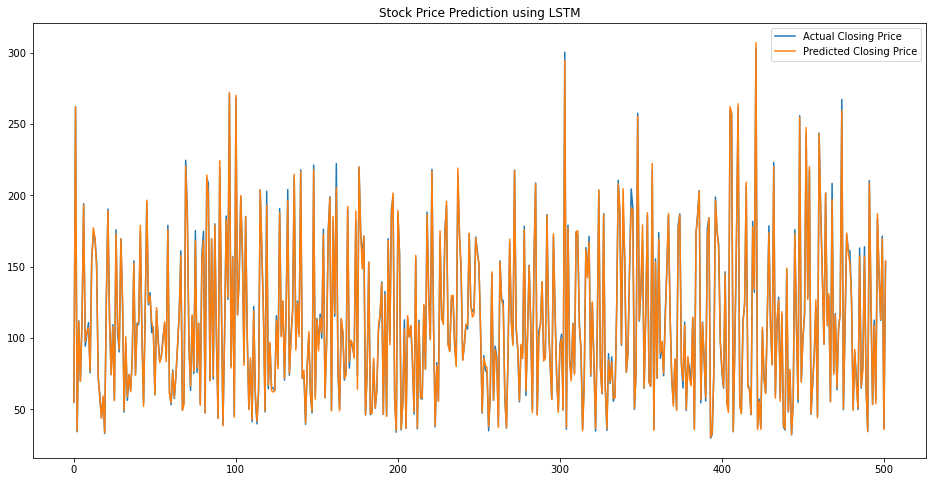

In [75]:
# Visualize the results
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction using LSTM')
plt.plot(y_test_actual, label='Actual Closing Price')
plt.plot(y_pred_actual, label='Predicted Closing Price')
plt.legend()
plt.show()
